In [112]:
import pandas
import numpy
import matplotlib.pyplot as pyplot
from Storage import DataStorage
from GeneticAlgorithm import GeneticParameters

In [113]:
storage = DataStorage("simulation_data.db")
df = storage.get_pandas_dataframe()

In [114]:
df.head()

,n,m,lattice_construct,d_min,k,damping,actuator_param_1,actuator_param_2,actuator_direction_selection,actuator_distance_factor,displacement,runtime,blps,experiment,generation
0,3,1283.0,1,15.0,6160.0,4327.0,[8970],0.0,"[1, 1, 1, 1, 0, 0, 1, 1]","[3, 5, 1, 4, 1, 2, 1, 1]",11.821515,20.0,0.017810,1,-1
1,4,191.0,1,51.0,8012.0,8376.0,[8059],0.0,"[1, 1, 1, 0, 0, 0, 0, 0]","[3, 4, 2, 4, 2, 3, 2, 2]",24.332580,20.0,0.012434,1,-1
2,5,517.0,1,30.0,3453.0,4458.0,[3814],0.0,"[1, 0, 1, 0, 1, 1, 0, 0]","[3, 2, 3, 3, 3, 4, 5, 2]",14.602393,20.0,0.015983,1,-1
3,6,1769.0,0,42.0,1565.0,6265.0,[8310],0.0,"[1, 1, 0, 1, 1, 0, 0, 1]","[3, 4, 5, 4, 3, 4, 5, 2]",33.872391,20.0,0.014498,1,-1
4,7,445.0,0,51.0,7365.0,3052.0,[4850],0.0,"[0, 0, 0, 1, 1, 1, 0, 0]","[2, 3, 5, 1, 5, 2, 5, 1]",49.091542,20.0,0.015065,1,-1


In [115]:
sine_wave_experiments = [53, 54, 55]
kuramoto_experiments = [94, 95, 96]

sine_wave_fastest_genes = dict()
for exp_no in sine_wave_experiments: sine_wave_fastest_genes[exp_no] = []

kuramoto_fastest_genes = dict()
for exp_no in kuramoto_experiments: kuramoto_fastest_genes[exp_no] = []

In [116]:
e = df[df['experiment'] == 53]['generation'].unique()
e

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 18

In [117]:
for exp_no in sine_wave_experiments:
    experiment = df[df['experiment'] == exp_no]
    generations = experiment['generation'].unique()
    generations.sort()
    for gen in generations:
        gen_data = experiment[experiment['generation'] == gen].sort_values(by=["blps"], ascending=False)
        fastest = gen_data.iloc[0]
        gene = GeneticParameters.get_genotype_from_data(fastest.to_dict())
        sine_wave_fastest_genes[exp_no].append(gene)

In [118]:
for exp_no in kuramoto_experiments:
    experiment = df[df['experiment'] == exp_no]
    generations = experiment['generation'].unique()
    generations.sort()
    for gen in generations:
        gen_data = experiment[experiment['generation'] == gen].sort_values(by=["blps"], ascending=False)
        fastest = gen_data.iloc[0]
        gene = GeneticParameters.get_genotype_from_data(fastest.to_dict())
        kuramoto_fastest_genes[exp_no].append(gene)

In [119]:
sine_best_blps = [[val.body_length_per_second for val in experiment] for experiment in sine_wave_fastest_genes.values()]
kuramoto_best_blps = [[val.body_length_per_second for val in experiment] for experiment in kuramoto_fastest_genes.values()]

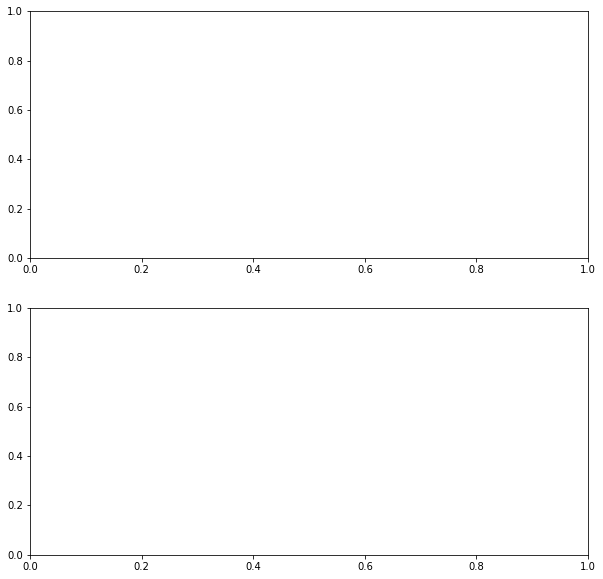

In [120]:
figure, axes = pyplot.subplots(2, figsize=(10, 10))

In [121]:
for ax in axes.flat:
    ax.cla()

for i,exp in enumerate(sine_best_blps):
    axes[0].plot(exp, label="Experiment " + str(i+1))
axes[0].legend()
for i,exp in enumerate(kuramoto_best_blps):
    axes[1].plot(exp, label="Experiment " + str(i+1))
axes[1].legend()

for ax in axes.flat:
    ax.set(xlabel="Generations", ylabel="Body lengths per second ($V_{b/s}$) ($cm\cdot s^{-1}$)")

axes[0].set_title("Sine wave actuation")
axes[1].set_title("CPG (Hopf) actuation")

Text(0.5, 1.0, 'CPG (Hopf) actuation')

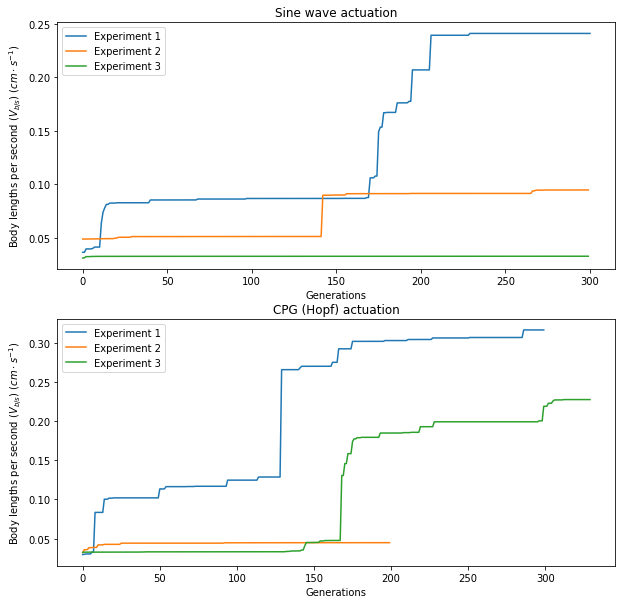

In [122]:
figure

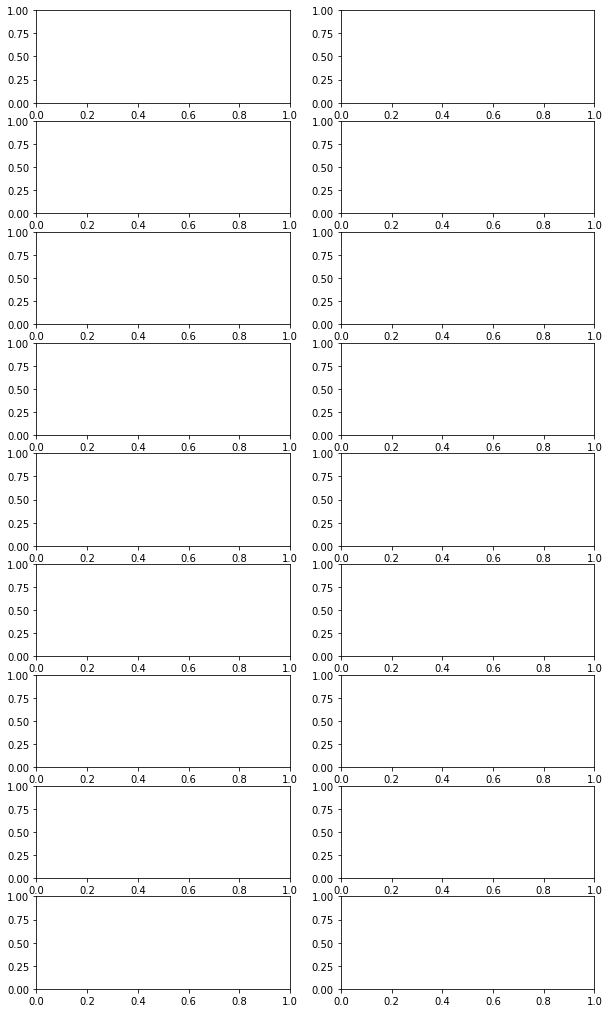

In [123]:
fig, ax = pyplot.subplots(9, 2, figsize=(10, 18))

In [124]:
sine_wave_best_n = [val.number_of_nodes for val in sine_wave_fastest_genes[53]]
sine_wave_best_m = [val.mass_per_node for val in sine_wave_fastest_genes[53]]
sine_wave_best_mass_radius = [val.mass_radius for val in sine_wave_fastest_genes[53]]
sine_wave_best_spring_constant = [val.spring_constant for val in sine_wave_fastest_genes[53]]
sine_wave_best_spring_damping = [val.spring_damping for val in sine_wave_fastest_genes[53]]
sine_wave_best_amplitude = [val.actuator_params[0] for val in sine_wave_fastest_genes[53]]
sine_wave_best_actuator_count = [numpy.array(val.actuator_direction_selector).sum() for val in sine_wave_fastest_genes[53]]
sine_wave_best_data = [sine_wave_best_n, sine_wave_best_m, sine_wave_best_mass_radius, sine_wave_best_spring_constant, sine_wave_best_spring_damping, sine_wave_best_amplitude, sine_wave_best_actuator_count]
sine_wave_best_labels = ["Number of nodes", "Mass per node", "Mass radius", "Spring Constant", "Spring Damping", "Amplitude", "Actuator Count"]

In [125]:
hopf_best_n = [val.number_of_nodes for val in kuramoto_fastest_genes[94]]
hopf_best_m = [val.mass_per_node for val in kuramoto_fastest_genes[94]]
hopf_best_mass_radius = [val.mass_radius for val in kuramoto_fastest_genes[94]]
hopf_best_spring_constant = [val.spring_constant for val in kuramoto_fastest_genes[94]]
hopf_best_spring_damping = [val.spring_damping for val in kuramoto_fastest_genes[94]]
hopf_best_amplitude = [val.actuator_params[1] for val in kuramoto_fastest_genes[94]]
hopf_best_actuator_count = [numpy.array(val.actuator_direction_selector).sum() for val in kuramoto_fastest_genes[94]]
hopf_best_alpha = [val.actuator_params[2] for val in kuramoto_fastest_genes[94]]
hopf_best_beta = [val.actuator_params[3] for val in kuramoto_fastest_genes[94]]
hopf_best_data = [hopf_best_n, hopf_best_m, hopf_best_mass_radius, hopf_best_spring_constant, hopf_best_spring_damping, hopf_best_amplitude, hopf_best_actuator_count, hopf_best_alpha, hopf_best_beta]
hopf_best_labels = ["Number of nodes", "Mass per node", "Mass radius", "Spring Constant", "Spring Damping", "Amplitude", "Actuator Count", "Alpha", "Beta"]

In [126]:
for a in ax.flat:
    a.cla()
for i in range(7):
    ax[i][0].plot(sine_wave_best_data[i])
    ax[i][0].set(ylabel=sine_wave_best_labels[i], xlabel="Generations")
for i in range(9):
    ax[i][1].plot(hopf_best_data[i])
    ax[i][1].set(ylabel=hopf_best_labels[i], xlabel="Generations")

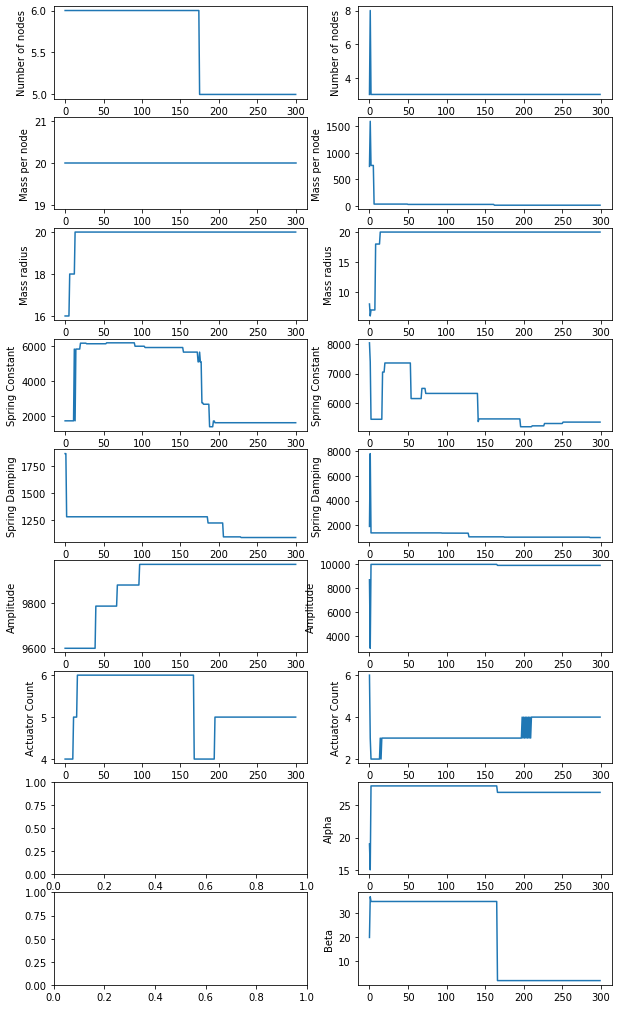

In [127]:
fig

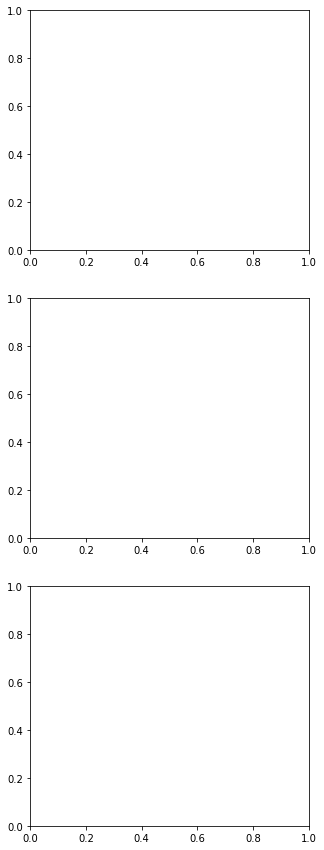

In [162]:
fig_2, ax_2 = pyplot.subplots(3, figsize=(5, 15))

In [163]:
no_feedback_experiments = [940, 950, 960]
for i, exp_no in enumerate(no_feedback_experiments):
    no_feedback = df[df['experiment'] == exp_no].sort_values(by=["blps"], ascending=True)
    to_plot = []
    for row in no_feedback.iloc:
        gene = GeneticParameters.get_genotype_from_data(row.to_dict())
        to_plot.append(gene.body_length_per_second)
    ax_2[i].cla()
    ax_2[i].plot(kuramoto_best_blps[i], label="with feedback")
    ax_2[i].plot(to_plot, label="without feedback")
    ax_2[i].set(title="Experiment " + str(i+1), xlabel="Generation", ylabel="Performance (BLPS)")
    ax_2[i].legend()

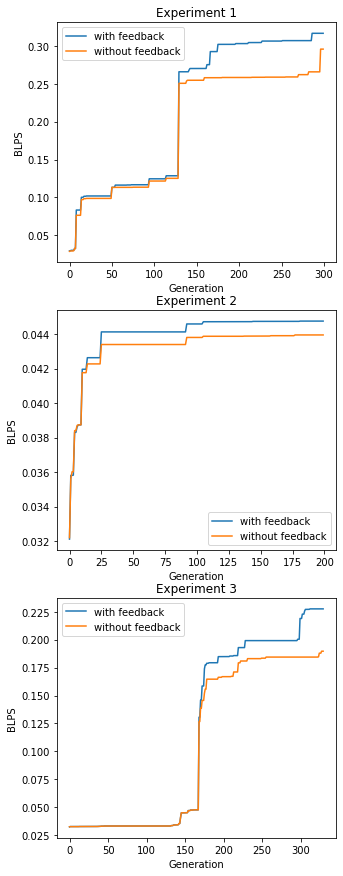

In [164]:
fig_2

In [131]:
len(to_plot)

330

In [132]:
exp_fb_nums = [300, 200, 100]
exp_nofb_nums = [301, 201, 101]

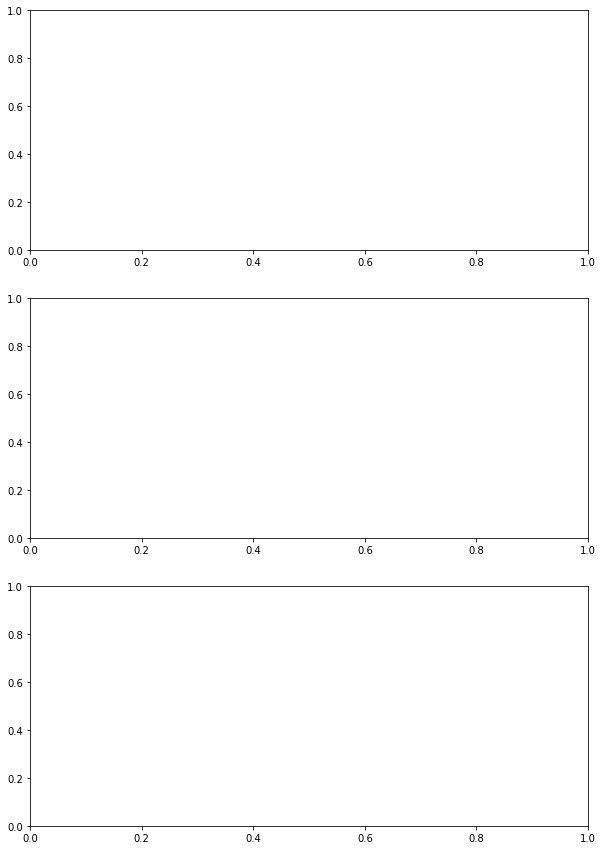

In [157]:
fig_3, ax_3 = pyplot.subplots(3, figsize=(10, 15))

In [160]:
for i in range(len(exp_fb_nums)):
    exp_with_feedback = df[df['experiment'] == exp_fb_nums[i]]
    exp_without_feedback = df[df['experiment'] == exp_nofb_nums[i]]
    fb_plt = []
    for row in exp_with_feedback.iloc:
        gene = GeneticParameters.get_genotype_from_data(row.to_dict())
        fb_plt.append(gene.body_length_per_second)
    nofb_plt = []
    for row in exp_without_feedback.iloc:
        gene = GeneticParameters.get_genotype_from_data(row.to_dict())
        nofb_plt.append(gene.body_length_per_second)
    print("Len fb:", len(fb_plt), " ; nofb: ", len(nofb_plt))
    ax_3[i].cla()
    ax_3[i].plot(fb_plt, label="With feedback")
    ax_3[i].plot(nofb_plt, label="Without feedback")
    ax_3[i].set(title="Experiment " + str(i + 1), xlabel="Randomized terrain", ylabel="Performance (BLPS)")
    ax_3[i].legend()

Len fb: 99  ; nofb:  99
Len fb: 99  ; nofb:  99
Len fb: 99  ; nofb:  99


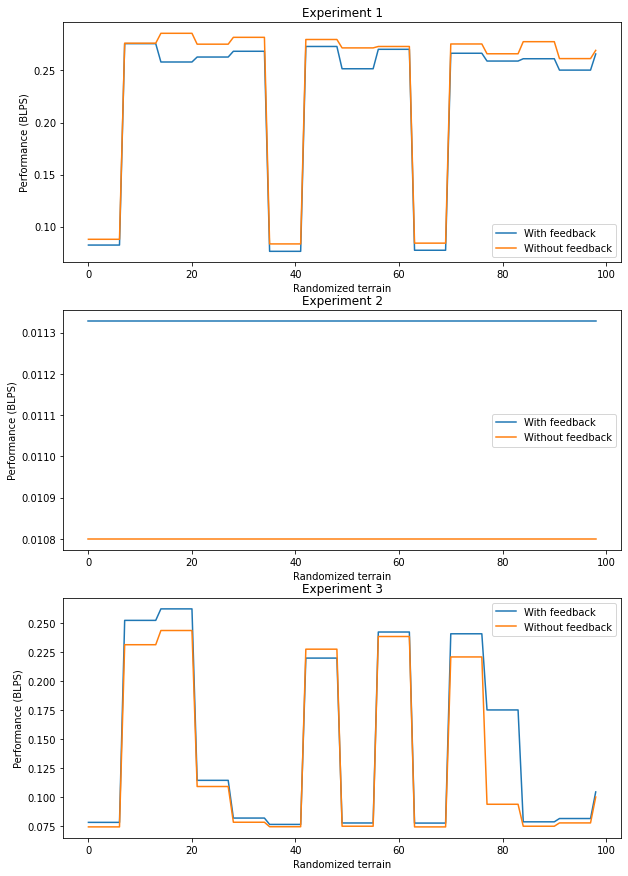

In [161]:
fig_3